In [180]:
from pydataset import data
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

import acquire


## Data Acquisition

### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [20]:
def get_summary(df):
    '''
    get_summary will take in one positional argument, a single pandas DF, 
    and will output info to the console regarding the following info:
    - print the first 3 rows
    - print the # of rows and columns
    - print the columns
    - print the dtypes of each col
    - print summary statistics
    
    return:none
    '''

    print('First 3 rows of the dataframe:')
    print(df.head(3))
    print('~~~~~~~~~~~~~~')
    print('Number of Rows and Cols in DF:')
    print(f'Rows: {df.shape[0]}, Cols: {df.shape[1]}')
    print('~~~~~~~~~~~~~~')
    print('Column Names:')
    [print(col) for col in df.columns]
    print('~~~~~~~~~~~~~~')
    [print(col,'- datatype:', df[col].dtype) for col in df.columns]
    print('~~~~~~~~~~~~~~')
    print(df.describe().T)
    print('~~~~~~~~~~~~~~')
    print('Descriptive stats for Object Variables: ')
    print(df.loc[:, df.dtypes=='O'].describe().T)
    print('~~~~~~~~~~~~~~')
    for col in df.loc[:, df.dtypes=='O']:
        if df[col].nunique() > 10:
            print(f'Column {col} has too many uniques ({df[col].nunique()}) to display')
        else:
            print(f' {col}: ', df[col].unique())

    

In [21]:
df_iris = data('iris')

In [22]:
get_summary(df_iris)

First 3 rows of the dataframe:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
~~~~~~~~~~~~~~
Number of Rows and Cols in DF:
Rows: 150, Cols: 5
~~~~~~~~~~~~~~
Column Names:
Sepal.Length
Sepal.Width
Petal.Length
Petal.Width
Species
~~~~~~~~~~~~~~
Sepal.Length - datatype: float64
Sepal.Width - datatype: float64
Petal.Length - datatype: float64
Petal.Width - datatype: float64
Species - datatype: object
~~~~~~~~~~~~~~
              count      mean       std  min  25%   50%  75%  max
Sepal.Length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
Sepal.Width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
Petal.Length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
Petal.Width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
~~~~~~~~~~~~~~
Descriptive stats for Object 

* print the first 3 rows


In [23]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


* print the number of rows and columns (shape)


In [24]:
df_iris.shape

(150, 5)

* print the column names


In [25]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

* print the data type of each column


In [26]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


* print the summary statistics for each of the numeric variables

In [27]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Read the data from this google sheet into a dataframe, df_google.

In [28]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'   

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* print the first 3 rows


In [29]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* print the number of rows and columns


In [30]:
df_google.shape

(891, 12)

* print the column names


In [31]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* print the data type of each column


In [32]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* print the summary statistics for each of the numeric variables


In [33]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


* print the unique values for each of your categorical variables

In [34]:
# Need unique vals for all the categorical columns
# Name, Sex, Ticket, Cabin, Embarked
print(df_google['Name'].unique())
print(df_google['Sex'].unique())
print(df_google['Ticket'].unique())
print(df_google['Cabin'].unique())
print(df_google['Embarked'].unique())


['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

### Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [35]:
df_excel = pd.read_excel('train.xlsx')        

* assign the first 100 rows to a new dataframe, df_excel_sample


In [36]:
df_excel_sample = df_excel.head(100)

* print the number of rows of your original dataframe


In [37]:
df_excel.shape[0]

891

* print the first 5 column names


In [38]:
df_excel.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

* print the column names that have a data type of object


In [39]:
list(df_excel_sample.select_dtypes(include='object'))

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

* compute the range for each of the numeric variables.

In [40]:
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [41]:
def _range(series):
 return series.max() - series.min()

In [42]:
print(df_excel[['Age', "Fare"]].agg([_range]))

          Age      Fare
_range  79.58  512.3292


## Data Preperation

### Using the Iris Data:


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire


1. Use the function defined in acquire.py to load the iris data.



In [257]:
iris_df = acquire.get_iris()
iris_df.head(3)


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


2. Drop the species_id and measurement_id columns.



In [258]:
iris_df.drop(['species_id' , 'measurement_id'], axis=1, inplace=True)

In [259]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


3. Rename the species_name column to just species.



In [260]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).



In [261]:
dummy_iris = pd.get_dummies(iris_df['species'], drop_first=True, dtype=int)
dummy_iris.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [262]:
iris_df = pd.concat([iris_df, dummy_iris], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [263]:
def prep_iris(iris_df):
    # drop columns
      # rename species_name column to species
    iris_df =  iris_df.drop(['species_id' , 'measurement_id'], axis=1).rename(columns={'species_name': 'species'})
    
    # create dummies for species and then join to iris_df
    dummy_iris = pd.get_dummies(iris_df['species'], drop_first=True, dtype=int)
    iris_df = pd.concat([iris_df, dummy_iris], axis=1)
    
    return iris_df
    


In [267]:
# testing prep_iris function
iris_df = acquire.get_iris()
iris_df.head(3)


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa


In [268]:
iris_df = prep_iris(iris_df)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


### Using the Titanic dataset



1. Use the function defined in acquire.py to load the Titanic data.



In [269]:
titanic_df = acquire.get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


2. Drop any unnecessary, unhelpful, or duplicated columns.



In [270]:
get_summary(titanic_df)

First 3 rows of the dataframe:
   passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   

  embarked  class deck  embark_town  alone  
0        S  Third  NaN  Southampton      0  
1        C  First    C    Cherbourg      0  
2        S  Third  NaN  Southampton      1  
~~~~~~~~~~~~~~
Number of Rows and Cols in DF:
Rows: 891, Cols: 13
~~~~~~~~~~~~~~
Column Names:
passenger_id
survived
pclass
sex
age
sibsp
parch
fare
embarked
class
deck
embark_town
alone
~~~~~~~~~~~~~~
passenger_id - datatype: int64
survived - datatype: int64
pclass - datatype: int64
sex - datatype: object
age - datatype: float64
sibsp - datatype: int64
parch - datatype: int64
fare - datatype: float64
embarked - datatype: object
class - datatype: object
deck - datatype: object
embark_tow

In [271]:
titanic_df = titanic_df.drop(columns =['embarked','class','deck', 'age'])
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [272]:
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], drop_first=True, dtype=int)
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1


4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [273]:
def prep_titanic(titanic_df):
    #drop columns
    titanic_df = titanic_df.drop(columns =['embarked','class','deck', 'age'])
    #create dummies
    dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], drop_first=True, dtype=int)
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    
    
    return titanic_df
    

In [274]:
# testing the prep_titanic function
titanic_df = acquire.get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [275]:
titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


### Using the Telco dataset



1. Use the function defined in acquire.py to load the Telco data.



In [284]:
telco_df = acquire.get_telco_data()
telco_df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [285]:
get_summary(telco_df)

First 3 rows of the dataframe:
   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 2  0002-ORFBO   
1                2                         1                 1  0003-MKNFE   
2                1                         2                 1  0004-TLHLJ   

   gender  senior_citizen partner dependents  tenure phone_service  \
0  Female               0     Yes        Yes       9           Yes   
1    Male               0      No         No       9           Yes   
2    Male               0      No         No       4           Yes   

  multiple_lines online_security online_backup device_protection tech_support  \
0             No              No           Yes                No          Yes   
1            Yes              No            No                No           No   
2             No              No            No               Yes           No   

  streaming_tv streaming_movies paperless_billing 

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [286]:
telco_df.isnull().sum()

payment_type_id                0
internet_service_type_id       0
contract_type_id               0
customer_id                    0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
tenure                         0
phone_service                  0
multiple_lines                 0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
paperless_billing              0
monthly_charges                0
total_charges                  0
churn                          0
contract_type                  0
internet_service_type       1526
payment_type                   0
dtype: int64

In [288]:
pd.crosstab(telco_df['contract_type'], telco_df['contract_type_id'])
# drop contract_type_id and dummy contract_type

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [289]:
pd.crosstab(telco_df['payment_type'], telco_df['payment_type_id'])

#get rid of payment_type_id and add dummies for payment_type

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [290]:
pd.crosstab(telco_df['internet_service_type'], telco_df['internet_service_type_id'])
# drop internet_service_type_id and dummy the internet_service_type after updating null val to 'no internet'

internet_service_type_id,1,2
internet_service_type,,
DSL,2421,0
Fiber optic,0,3096


In [291]:
telco_df.internet_service_type_id.value_counts()

internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64

In [292]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [293]:
telco_df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [294]:
telco_df = telco_df.drop(columns =['payment_type_id','internet_service_type_id','contract_type_id'])
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [295]:
pd.set_option('display.max_columns', None)

In [296]:
dummy_list = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
dummy_df = pd.get_dummies(telco_df[dummy_list], dtype=int, drop_first=True)

telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [297]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [298]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1


In [299]:
cols_to_drop = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
telco_df_clean = telco_df.drop(columns= cols_to_drop)



In [300]:
telco_df_clean.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.3,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.4,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.4,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1


4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [487]:
def prep_telco(telco_df):
    #drop duplicate columns
    telco_df = telco_df.drop(columns =['payment_type_id','internet_service_type_id','contract_type_id'])
    #create dummies
    dummy_list = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    dummy_df = pd.get_dummies(telco_df[dummy_list], dtype=int, drop_first=True)
    # join dummy & telco_df
    telco_df = pd.concat([telco_df, dummy_df], axis=1)
    # drop str column categories
    cols_to_drop = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    telco_df = telco_df.drop(columns= cols_to_drop)
    #total_charges.str.replace(' ', '0').astype(float)
    telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0').astype(float)

    return telco_df

In [306]:
# check function
telco_df = acquire.get_telco_data()
telco_df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [307]:
telco_df = prep_telco(telco_df)
telco_df.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.3,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.4,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.4,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1


### Split your data



1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.



In [310]:
def split_data(df, target_variable):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target_variable])
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train_validate[target_variable])
    
    print(f'Train: {len(train)/len(df)}')
    print(f'Validate: {len(validate)/len(df)}')
    print(f'Test: {len(test)/len(df)}')

    return train, validate, test



2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.



In [311]:
split_data(iris_df, 'species')

Train: 0.6
Validate: 0.2
Test: 0.2


(     sepal_length  sepal_width  petal_length  petal_width     species  \
 70            5.9          3.2           4.8          1.8  versicolor   
 123           6.3          2.7           4.9          1.8   virginica   
 87            6.3          2.3           4.4          1.3  versicolor   
 3             4.6          3.1           1.5          0.2      setosa   
 15            5.7          4.4           1.5          0.4      setosa   
 53            5.5          2.3           4.0          1.3  versicolor   
 20            5.4          3.4           1.7          0.2      setosa   
 50            7.0          3.2           4.7          1.4  versicolor   
 54            6.5          2.8           4.6          1.5  versicolor   
 52            6.9          3.1           4.9          1.5  versicolor   
 81            5.5          2.4           3.7          1.0  versicolor   
 88            5.6          3.0           4.1          1.3  versicolor   
 145           6.7          3.0       

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.



In [312]:
split_data(titanic_df, 'survived')

Train: 0.5993265993265994
Validate: 0.19977553310886645
Test: 0.20089786756453423


(     passenger_id  survived  pclass     sex  sibsp  parch      fare  \
 455           455         1       3    male      0      0    7.8958   
 380           380         1       1  female      0      0  227.5250   
 492           492         0       1    male      0      0   30.5000   
 55             55         1       1    male      0      0   35.5000   
 243           243         0       3    male      0      0    7.1250   
 ..            ...       ...     ...     ...    ...    ...       ...   
 695           695         0       2    male      0      0   13.5000   
 128           128         1       3  female      1      1   22.3583   
 636           636         0       3    male      0      0    7.9250   
 222           222         0       3    male      0      0    8.0500   
 496           496         1       1  female      1      0   78.2667   
 
      embark_town  alone  sex_male  embark_town_Queenstown  \
 455    Cherbourg      1         1                       0   
 380    Ch

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.




In [314]:
split_data(telco_df, 'churn_Yes')

Train: 0.5998864120403238
Validate: 0.20005679397983814
Test: 0.20005679397983814


(     customer_id  senior_citizen  tenure  monthly_charges total_charges  \
 5911  8319-QBEHW               0      26            39.95       1023.75   
 2479  3547-LQRIK               0      47            26.90       1250.85   
 5889  8280-MQRQN               0       1            50.45         50.45   
 6087  8626-PTQGE               0      69            60.05        4176.7   
 785   1142-IHLOO               0      51            87.55        4475.9   
 ...          ...             ...     ...              ...           ...   
 6102  8642-GVWRF               0       2            79.70           165   
 356   0523-VNGTF               1      52            50.50        2566.3   
 1756  2568-BRGYX               0       4            70.20        237.95   
 2127  3057-VJJQE               0      35            55.25        1924.1   
 3586  5081-NWSUP               0      10            64.90        685.55   
 
       gender_Male  partner_Yes  dependents_Yes  phone_service_Yes  \
 5911           

## Exploratory Analysis

### Part 1

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [315]:
iris_df = acquire.get_iris()


In [316]:
iris_df = prep_iris(iris_df)

In [317]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0


In [320]:
train, validate, test = split_data(iris_df, 'species')

Train: 0.6
Validate: 0.2
Test: 0.2


### 2. Univariate Stats



* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).



In [321]:
# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in train:
    # check to see if its an object type,
    # if so toss it in categorical
    if train[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if train[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [323]:
print(num_cols)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [325]:
import seaborn as sns

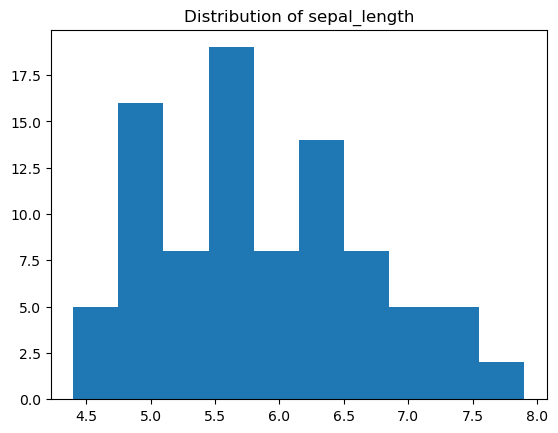

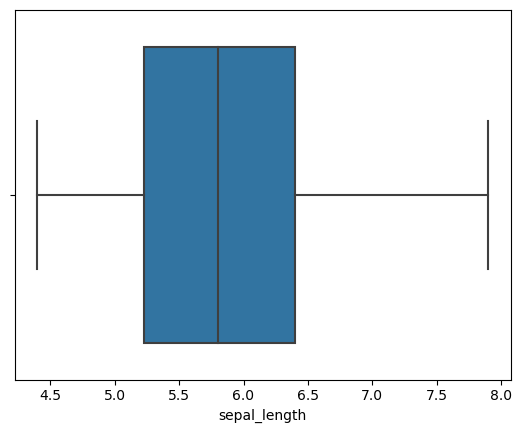

~~~~~~~~~~~~


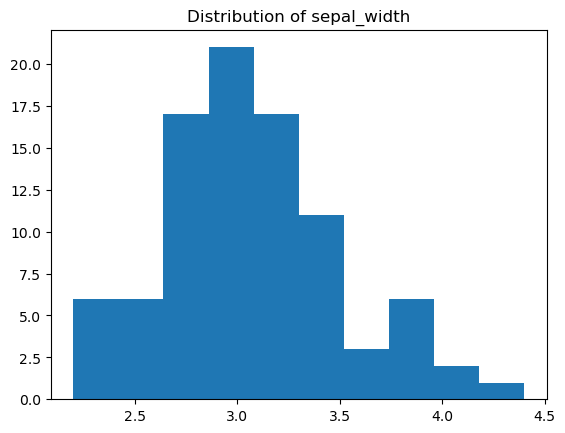

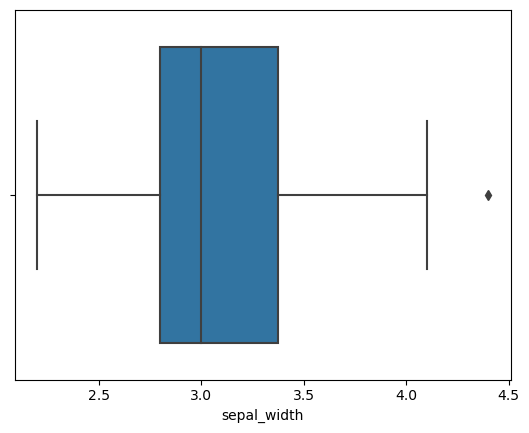

~~~~~~~~~~~~


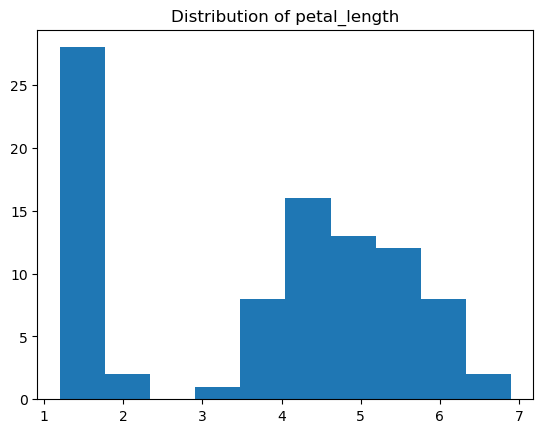

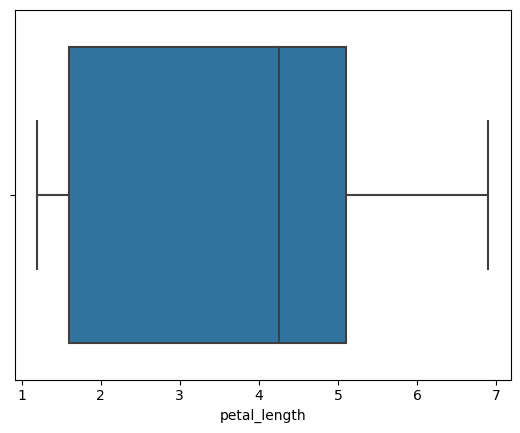

~~~~~~~~~~~~


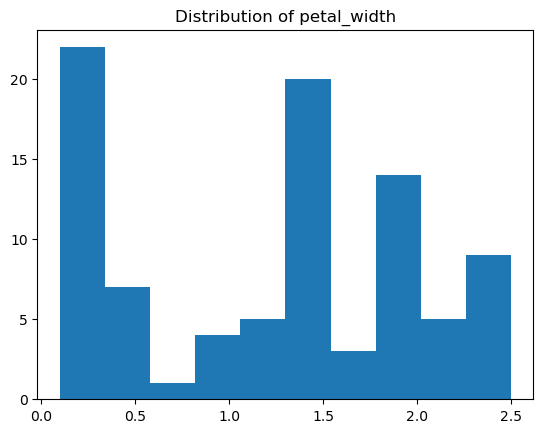

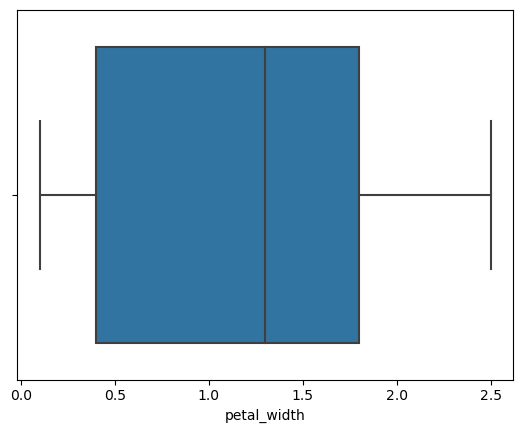

~~~~~~~~~~~~


In [326]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train, x=col)
    plt.show()
    print('~~~~~~~~~~~~')

In [330]:
train.describe().T.drop(['versicolor', 'virginica'])

,count,mean,std,min,25%,50%,75%,max
sepal_length,90.0,5.875556,0.792282,4.4,5.225,5.80,6.400,7.9
sepal_width,90.0,3.070000,0.436135,2.2,2.800,3.00,3.375,4.4
petal_length,90.0,3.782222,1.742114,1.2,1.600,4.25,5.100,6.9
petal_width,90.0,1.203333,0.755422,0.1,0.400,1.30,1.800,2.5


 * For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [331]:
print(cat_cols)

['species', 'versicolor', 'virginica']


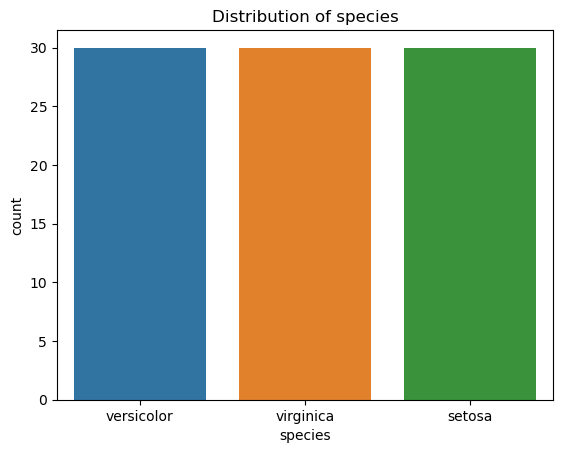

~~~~~~~~~~~~


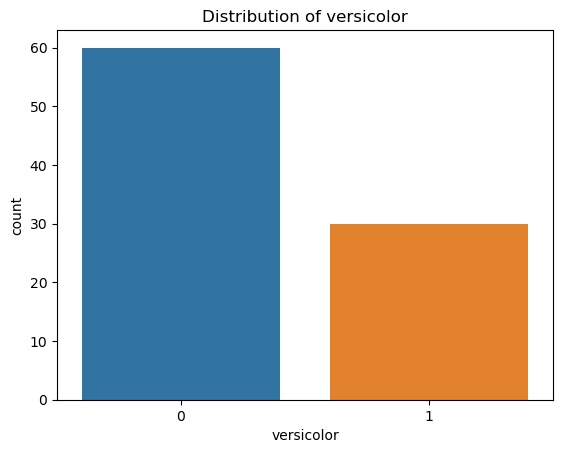

~~~~~~~~~~~~


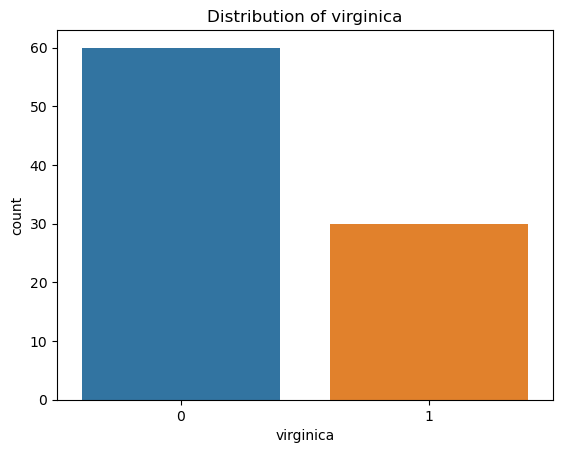

~~~~~~~~~~~~


In [336]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    print('~~~~~~~~~~~~')

* Document takeaways & any actions.



        Quantitative Observations

        - sepal width and sepal length seem to have a normal distributive 
        properties and a relation with one another

        - pedal width and pedal length seem to have a close relationship 
        in how they are distributed

        Qualitative Observations

        - It appears that the samples were taken evenly across the 3      species (setosa, versicolor, virginica)

### 3. Bivariate Stats



* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



In [338]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'versicolor', 'virginica'],
      dtype='object')

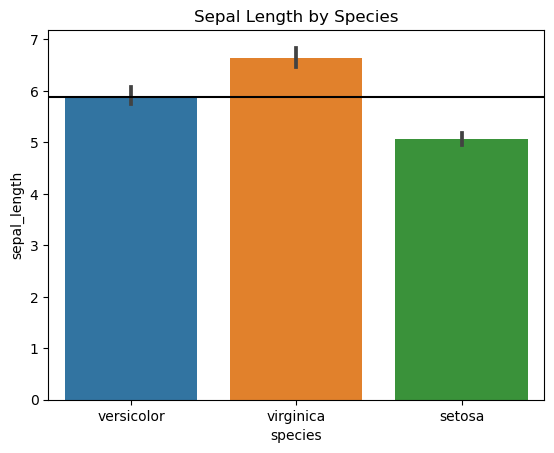

In [343]:
# sepal length
sns.barplot(
    data=train,
    x='species',
    y='sepal_length')
plt.axhline(train.sepal_length.mean(), color='black')
plt.title('Sepal Length by Species')
plt.show()


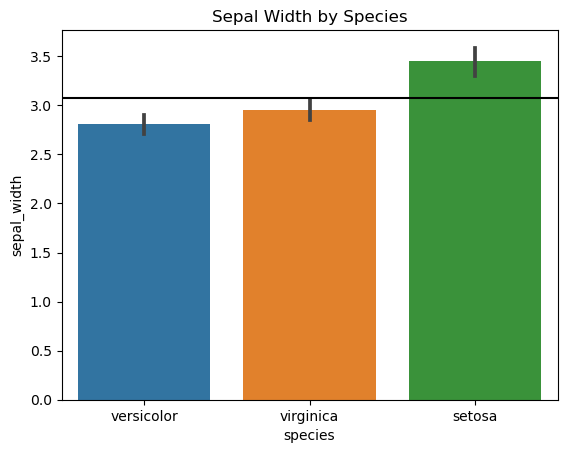

In [344]:
# sepal width
sns.barplot(
    data=train,
    x='species',
    y='sepal_width')
plt.axhline(train.sepal_width.mean(), color='black')
plt.title('Sepal Width by Species')
plt.show()

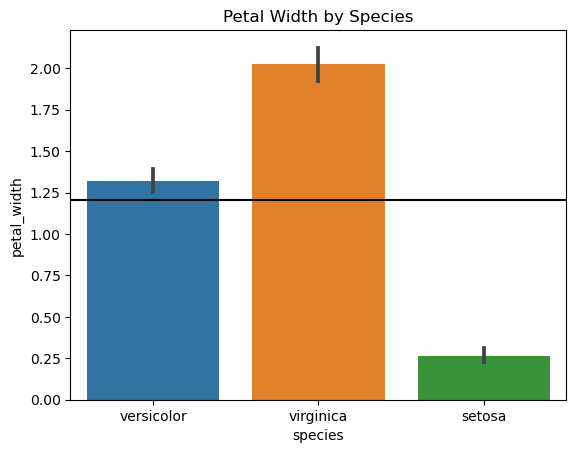

In [347]:
# pedal width
sns.barplot(
    data=train,
    x='species',
    y='petal_width')
plt.axhline(train.petal_width.mean(), color='black')
plt.title('Petal Width by Species')
plt.show()

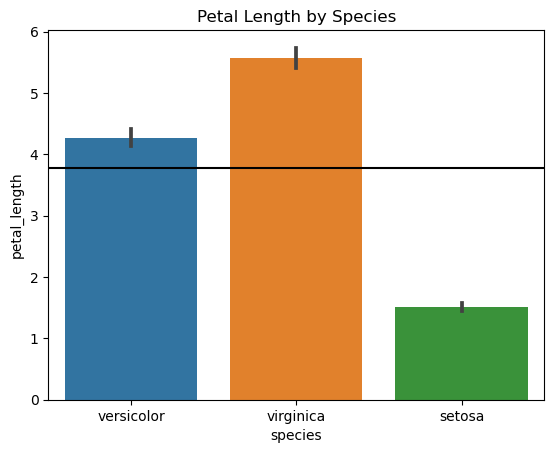

In [348]:
# pedal length
sns.barplot(
    data=train,
    x='species',
    y='petal_length')
plt.axhline(train.petal_length.mean(), color='black')
plt.title('Petal Length by Species')
plt.show()

* For each measurement type, compute the descriptive statistics for each species.



In [358]:
species_desc = train.groupby('species').describe().drop(columns=['versicolor', 'virginica']).T
species_desc

species                setosa  versicolor  virginica
sepal_length count  30.000000   30.000000  30.000000
             mean    5.070000    5.910000   6.646667
             std     0.356371    0.476590   0.533520
             min     4.400000    4.900000   5.800000
             25%     4.825000    5.600000   6.300000
             50%     5.000000    5.800000   6.500000
             75%     5.375000    6.175000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  30.000000   30.000000  30.000000
             mean    3.446667    2.806667   2.956667
             std     0.420782    0.281539   0.309263
             min     2.300000    2.300000   2.200000
             25%     3.200000    2.625000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.775000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  30.000000   30.000000  30.000000
             mean    1.510000    4.273333   5.563333
             std     0.178789    0.409317   0.492344
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.125000
             50%     1.500000    4.250000   5.550000
             75%     1.600000    4.575000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  30.000000   30.000000  30.000000
             mean    0.266667    1.320000   2.023333
             std     0.121296    0.193694   0.286095
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.375000    1.475000   2.300000
             max     0.600000    1.800000   2.500000

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



In [380]:
from scipy import stats

# petal width of the ver and vir
vir_pw_data = train[train.species == 'virginica']['petal_width']
ver_pw_data = train[train.species == 'versicolor']['petal_width']


In [381]:
# H0: there is no diff between petal width of the versicolor and the virginica mean
# HA: there is significant diff between petal width of the versicolor and the virginica means

stat, p = stats.mannwhitneyu(vir_pw_data,ver_pw_data, method='exact')
stat, p

(883.0, 2.049641547727942e-14)

In [382]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [383]:
# petal length of the ver and vir
vir_pl_data = train[train.species == 'virginica']['petal_length']
ver_pl_data = train[train.species == 'versicolor']['petal_length']


In [384]:
# H0: there is no diff between petal width of the versicolor and the virginica mean
# HA: there is significant diff between petal width of the versicolor and the virginica means

stat, p = stats.mannwhitneyu(vir_pl_data,ver_pl_data, method='exact')
stat, p

(892.5, 1.1330526707736975e-15)

In [385]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [388]:
# sepal length of the ver and vir
vir_sl_data = train[train.species == 'virginica']['sepal_length']
ver_sl_data = train[train.species == 'versicolor']['sepal_length']

In [390]:
# H0: there is no diff between petal width of the versicolor and the virginica mean
# HA: there is significant diff between petal width of the versicolor and the virginica means

stat, p = stats.mannwhitneyu(vir_sl_data,ver_sl_data, method='exact')
stat, p

(767.0, 6.815792665176921e-07)

In [391]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


In [392]:
# sepal width of the ver and vir
vir_sw_data = train[train.species == 'virginica']['sepal_width']
ver_sw_data = train[train.species == 'versicolor']['sepal_width']

In [393]:
stat, p = stats.mannwhitneyu(vir_sw_data,ver_sw_data, method='exact')
stat, p

(575.0, 0.06539911471328003)

In [394]:
if p < 0.05:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


* Document takeaways & any actions.

### 4. Multivariate Stats



* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



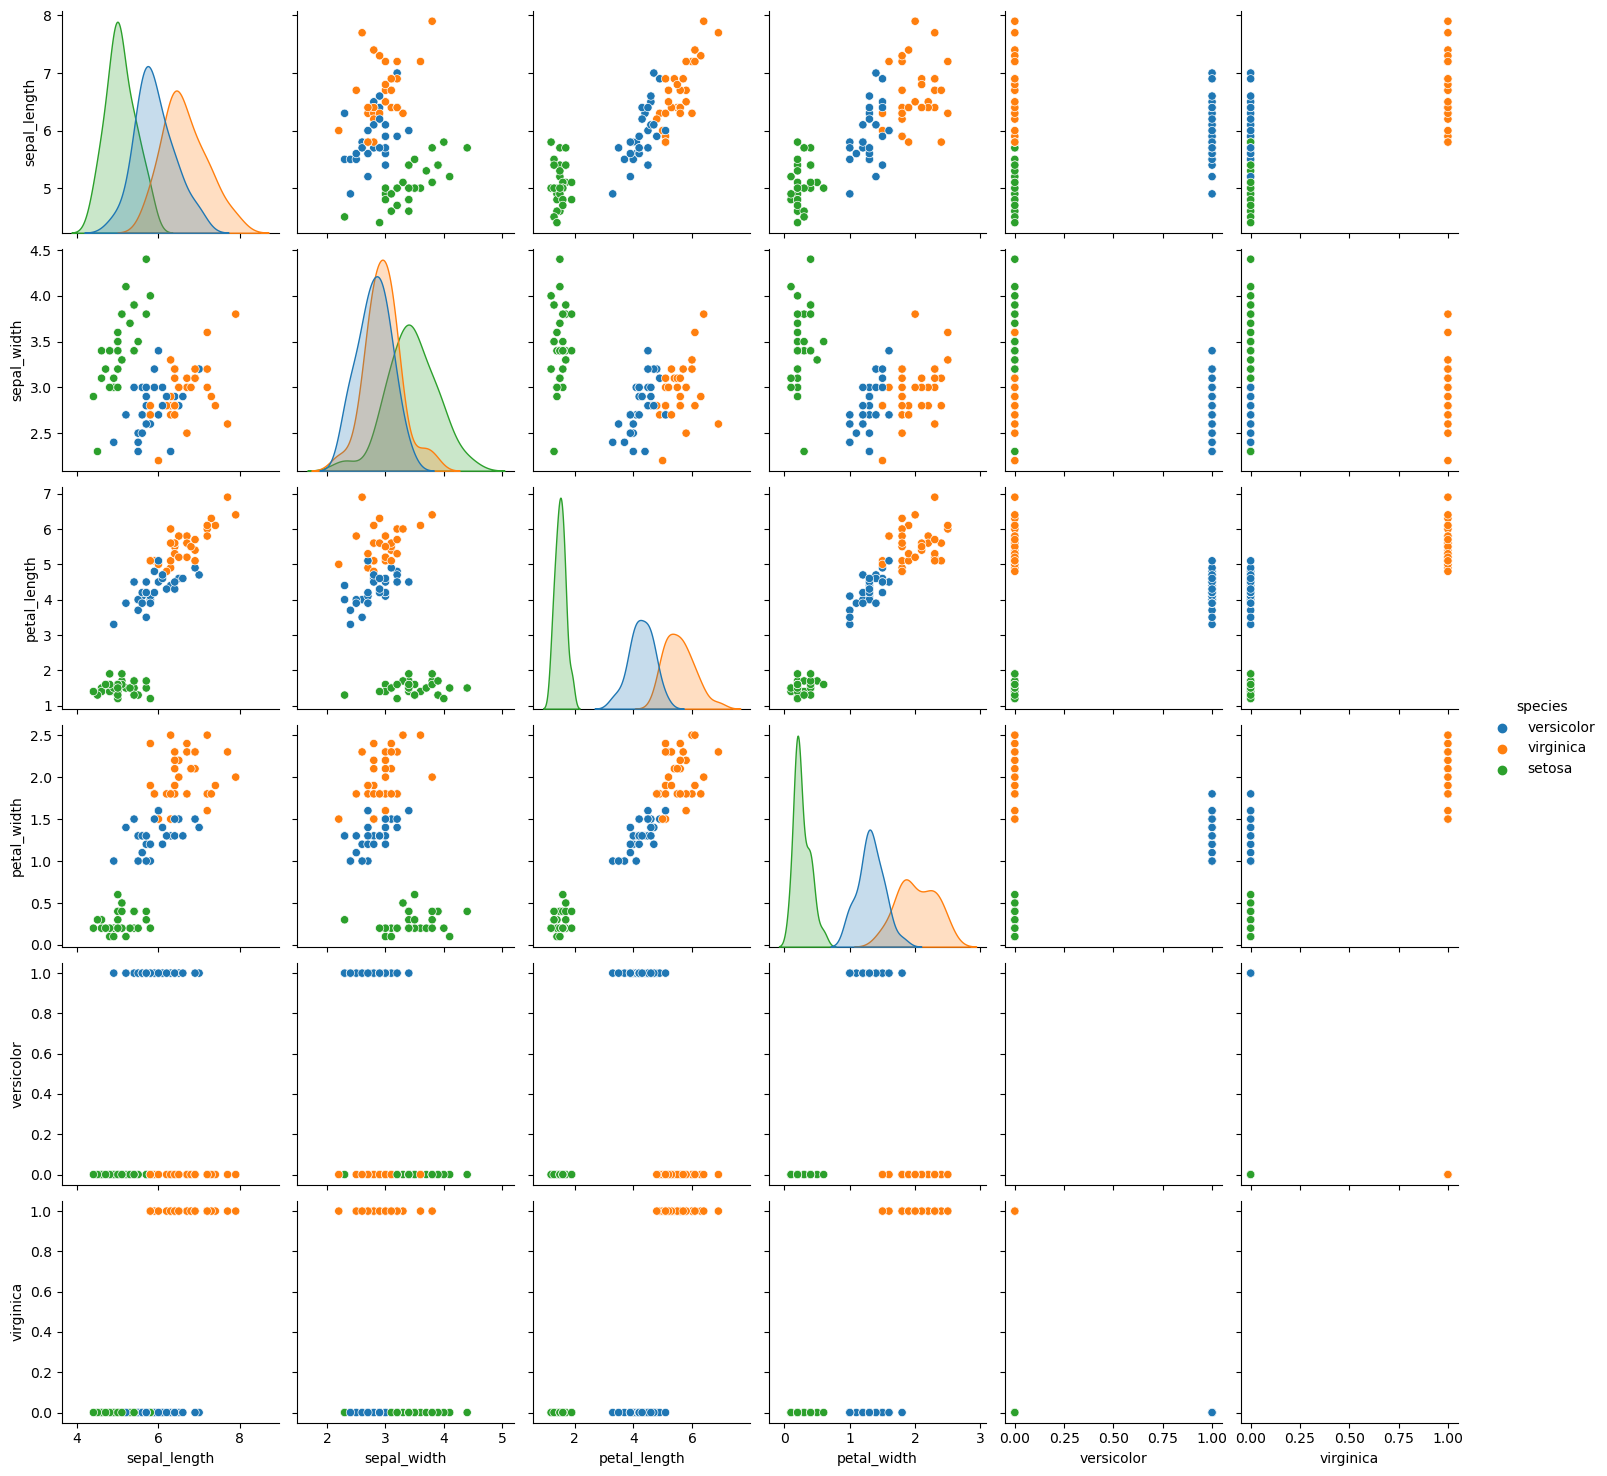

In [397]:
sns.pairplot(train, hue='species')


* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col



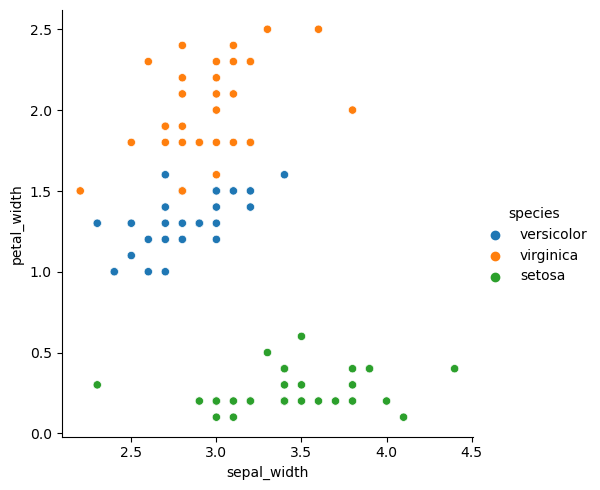

In [398]:
sns.relplot(x=train.sepal_width, y=train.petal_width, hue=train.species)

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



<Axes: xlabel='sepal_length', ylabel='petal_length'>

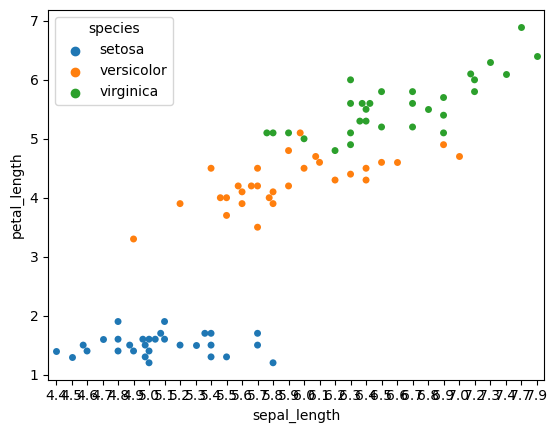

In [401]:
sns.swarmplot(x=train.sepal_length, y=train.petal_length, hue=train.species)

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



In [403]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

In [405]:
train[['sepal_area','petal_area']].head()

,sepal_area,petal_area
70,18.88,8.64
123,17.01,8.82
87,14.49,5.72
3,14.26,0.30
15,25.08,0.60


In [407]:
vir_sa_data = train[train.species == 'versicolor']['sepal_area']
set_sa_data = train[train.species == 'setosa']['sepal_area']

<Axes: xlabel='sepal_area', ylabel='Count'>

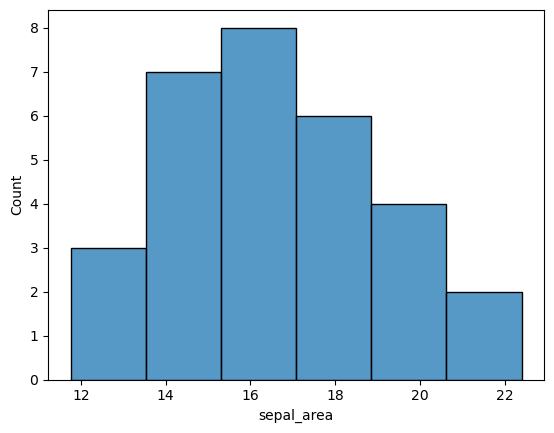

In [427]:
sns.histplot(vir_sa_data)

<Axes: xlabel='sepal_area', ylabel='Count'>

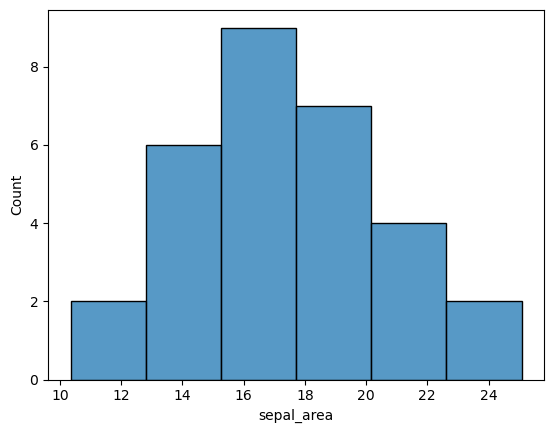

In [428]:
sns.histplot(set_sa_data)

In [423]:
# H0: mean of setosa and versicolor areas are no different
# HA: mean of setosa and versicolor area are significantly different
alpha = .05

In [422]:
# independent = yes
# Norm Distribution? yes
# equal var? False
print(vir_sa_data.var())
print(set_sa_data.var())

6.800830000000003
10.065846091954025


In [424]:
t, p = stats.ttest_ind(vir_sa_data, set_sa_data, equal_var=False)
t, p

(-1.2447514807376094, 0.21841602149338543)

In [425]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


is p/2 < alpha?  False
is t > 0?  False


In [426]:
if p / 2 > alpha:
    print("We fail to reject the null hypothesis")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


* Document takeaways and any actions.

In [ ]:
# used a 2 samp ttest to see if there was a difference in means for 
#virginica sepal area compared to the setosa sepal area

# the distribution for both sample sets appeared to be similar and normal

# the variance was different

# went with a 95% conf using an alpha of 0.05

# the p- value wasn't < the alpha so we fail to reject the null hypothesis
# so there is no difference in the means of the virginca sample than the setosa area



### Part II



Explore your titanic dataset more completely.



In [447]:
import acquire
titanic_data = acquire.get_titanic_data()

In [448]:
def split_titanic_data(df, target='survived'):
    '''
    split titanic data will split data based on 
    the values present in a cleaned version of titanic
    that is from clean_titanic
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1108,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1108,
                                   stratify=train_val[target])
    return train, validate, test

In [449]:
def clean_titanic(df):
    '''
    clean titanic will take in a single pandas dataframe
    and will proceed to drop redundant columns
    and nonuseful information
    in addition to addressing null values
    and encoding categorical variables
    '''
    #drop out any redundant, excessively empty, or bad columns
    df = df.drop(columns=['passenger_id','embarked','deck','class'])
    # impute average age and most common embark_town:
    train, validate, test = split_titanic_data(df)
    # impute missing values for our fields using sklearn's simpleimputer
    #create age imputer, with strategry mean
    my_age_imputer = SimpleImputer(strategy='mean')
    # use imputer object to fit to train ages
    my_age_imputer.fit(train[['age']])
    # tranform values in train, validate, and test based on mean fit from the last step
    train.loc[:,'age'] = my_age_imputer.transform(train[['age']])
    validate.loc[:,'age'] = my_age_imputer.transform(validate[['age']])
    test.loc[:,'age'] = my_age_imputer.transform(test[['age']])     
    # go through the same process with embark_town
    my_embark_imputer = SimpleImputer(strategy='most_frequent')
    my_embark_imputer.fit(train[['embark_town']])
    train.loc[:,'embark_town'] = my_embark_imputer.transform(train[['embark_town']])
    validate.loc[:,'embark_town'] = my_embark_imputer.transform(validate[['embark_town']])
    test.loc[:,'embark_town'] = my_embark_imputer.transform(test[['embark_town']])
    # encode categorical values: 
    train = pd.concat(
    [train, pd.get_dummies(train[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    validate = pd.concat(
    [validate, pd.get_dummies(validate[['sex', 'embark_town']],
                        drop_first=True)], axis=1)
    test = pd.concat(
    [test, pd.get_dummies(test[['sex', 'embark_town']],
                        drop_first=True)], axis=1)                                                  
    return train, validate, test

In [450]:
train, validate, test = clean_titanic(titanic_data)

In [451]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [452]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
271,1,3,male,25.0,0,0,0.0000,Southampton,1,True,False,True
786,1,3,female,18.0,0,0,7.4958,Southampton,1,False,False,True
86,0,3,male,16.0,1,3,34.3750,Southampton,0,True,False,True
353,0,3,male,25.0,1,0,17.8000,Southampton,0,True,False,True
199,0,2,female,24.0,0,0,13.0000,Southampton,1,False,False,True


* Determine drivers of the target variable


* Determine if certain columns should be dropped


* Determine if it would be valuable to bin some numeric columns


* Determine if it would be valuable to combine multiple columns into one.


Does it make sense to combine any features?



Do you find any surprises?



Document any and all findings and takeaways in your notebook using markdown.

### Part III

Explore your telco data to discover drivers of churn


In [488]:
telco_df = acquire.get_telco_data()

In [489]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [490]:
def prep2_telco(telco_df):
    #drop duplicate columns
    telco_df = telco_df.drop(columns =['payment_type_id','internet_service_type_id','contract_type_id'])
    #create dummies
    dummy_list = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    dummy_df = pd.get_dummies(telco_df[dummy_list], drop_first=True)
    # join dummy & telco_df
    telco_df = pd.concat([telco_df, dummy_df], axis=1)
    # drop str column categories
    cols_to_drop = ['gender','partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']
    telco_df = telco_df.drop(columns= cols_to_drop)
    #total_charges.str.replace(' ', '0').astype(float)
    telco_df.total_charges = telco_df.total_charges.str.replace(' ', '0').astype(float)

    return telco_df

In [491]:
telco = prep2_telco(telco_df)


In [492]:
telco.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,True
1,0003-MKNFE,0,9,59.9,542.40,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,0004-TLHLJ,0,4,73.9,280.85,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False
3,0011-IGKFF,1,13,98.0,1237.85,True,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,True,True,True,False,False,True,False,True,False
4,0013-EXCHZ,1,3,83.9,267.40,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,True,False,False,True


In [493]:
train, validate, test = split_data(telco, 'churn_Yes')

Train: 0.5998864120403238
Validate: 0.20005679397983814
Test: 0.20005679397983814


In [494]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 5911 to 3586
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   senior_citizen                         4225 non-null   int64  
 2   tenure                                 4225 non-null   int64  
 3   monthly_charges                        4225 non-null   float64
 4   total_charges                          4225 non-null   float64
 5   gender_Male                            4225 non-null   bool   
 6   partner_Yes                            4225 non-null   bool   
 7   dependents_Yes                         4225 non-null   bool   
 8   phone_service_Yes                      4225 non-null   bool   
 9   multiple_lines_No phone service        4225 non-null   bool   
 10  multiple_lines_Yes                     4225 non-null   bool   
 11  online

In [495]:
# I want to split the churns between yes and no's and the cat / nums

# separating our numeric and categorical columns:
# initialize two empty lists for each type:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in train:
    # check to see if its an object type,
    # if so toss it in categorical
    if train[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if train[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

In [496]:
cat_cols

['customer_id',
 'senior_citizen',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phone_service_Yes',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [497]:
num_cols

['tenure', 'monthly_charges', 'total_charges']

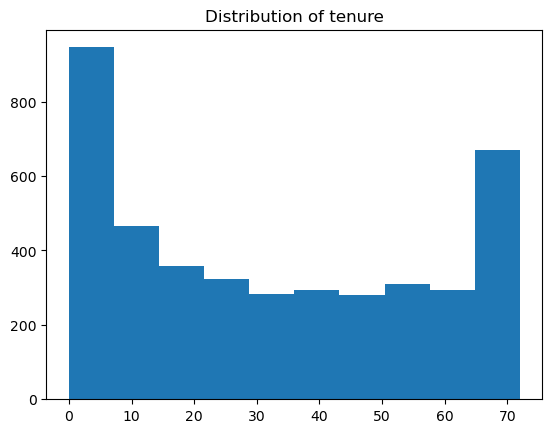

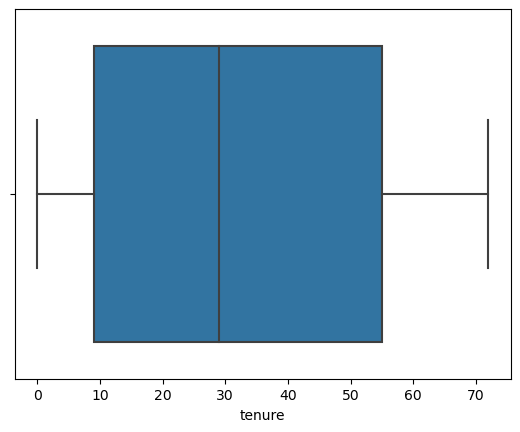

~~~~~~~~~~~~


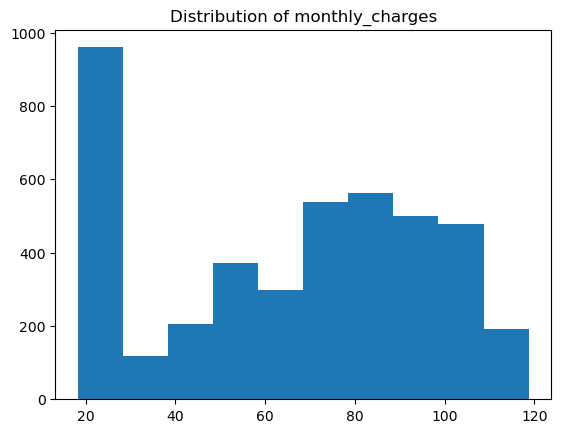

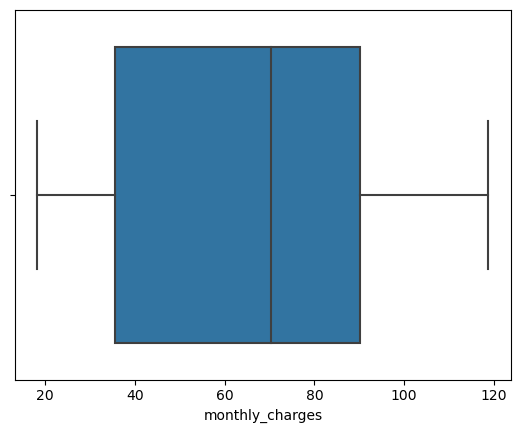

~~~~~~~~~~~~


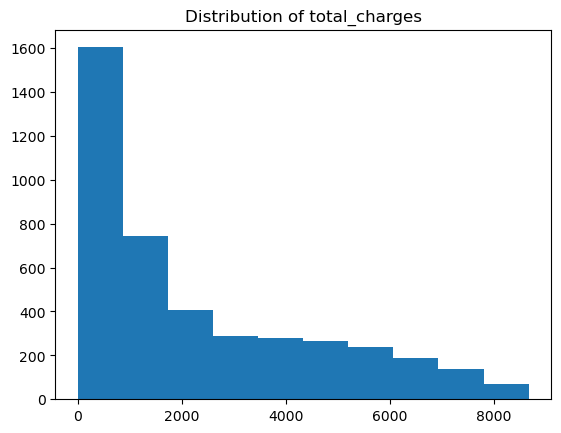

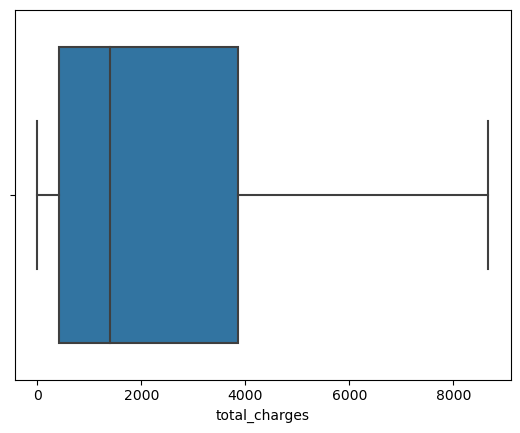

~~~~~~~~~~~~


In [498]:
for col in num_cols:
    plt.hist(train[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    sns.boxplot(data=train, x=col)
    plt.show()
    print('~~~~~~~~~~~~')

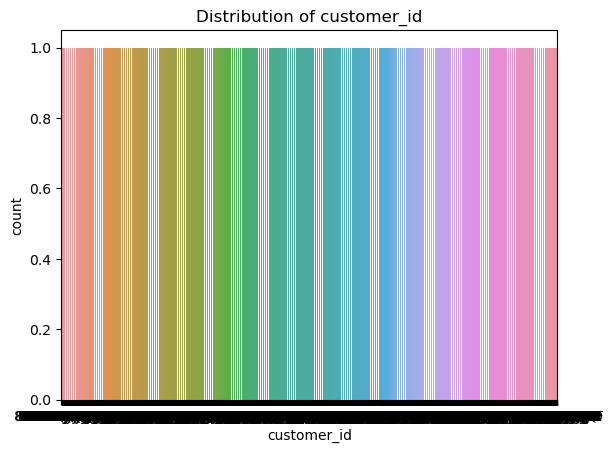

~~~~~~~~~~~~


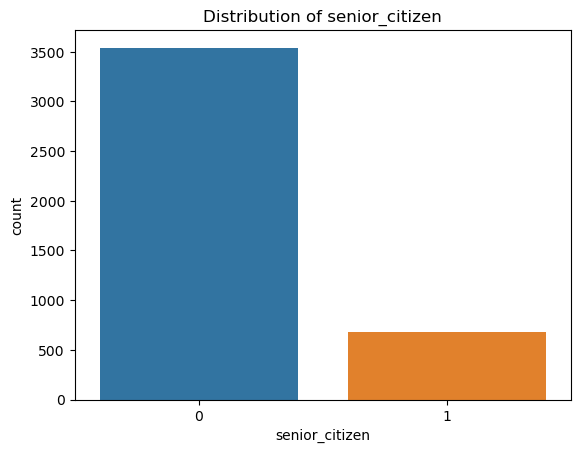

~~~~~~~~~~~~


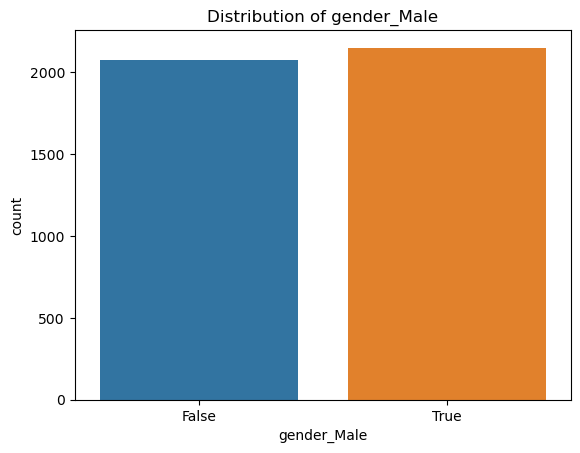

~~~~~~~~~~~~


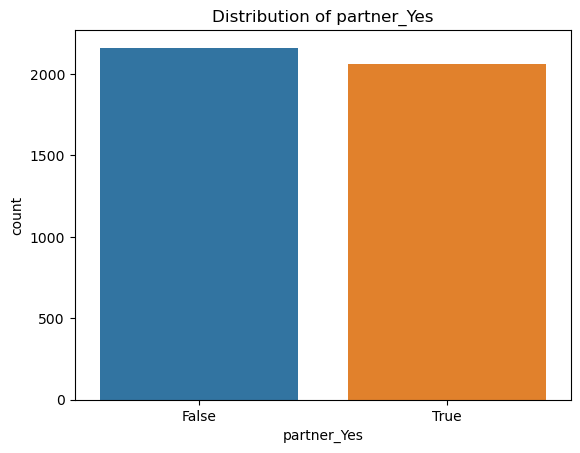

~~~~~~~~~~~~


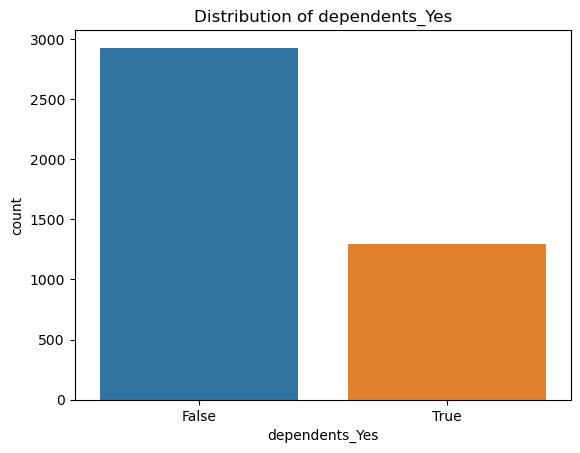

~~~~~~~~~~~~


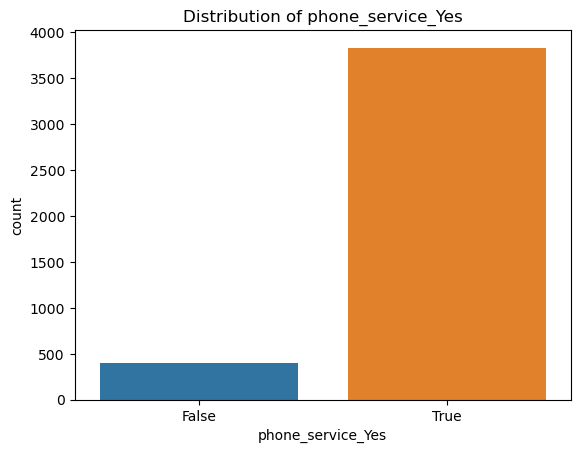

~~~~~~~~~~~~


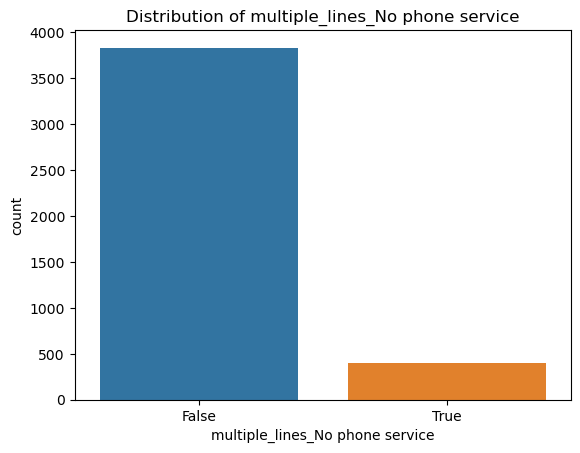

~~~~~~~~~~~~


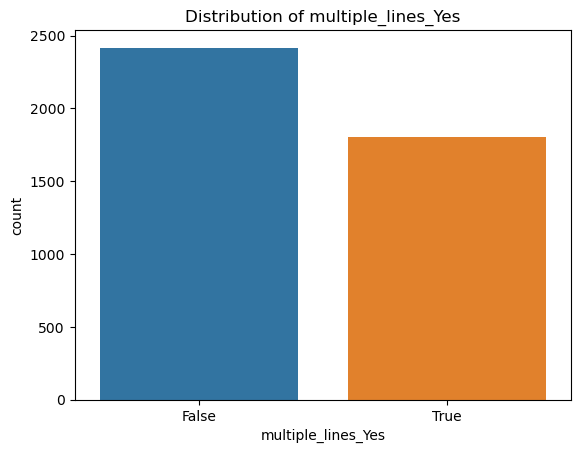

~~~~~~~~~~~~


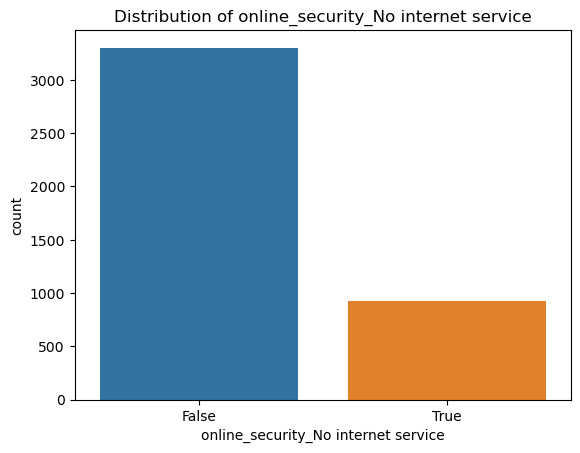

~~~~~~~~~~~~


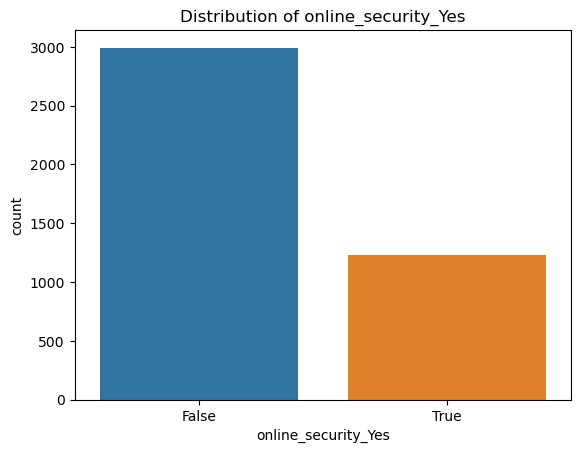

~~~~~~~~~~~~


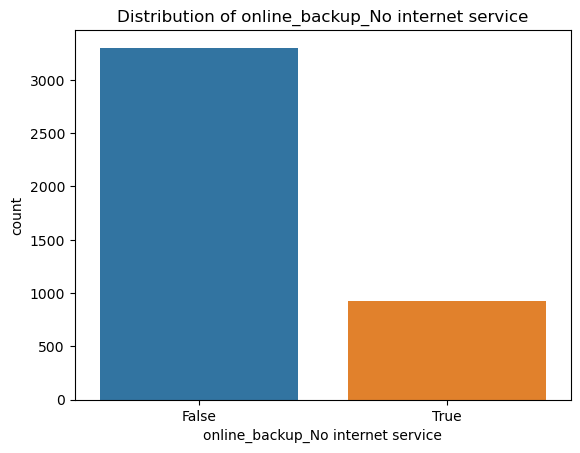

~~~~~~~~~~~~


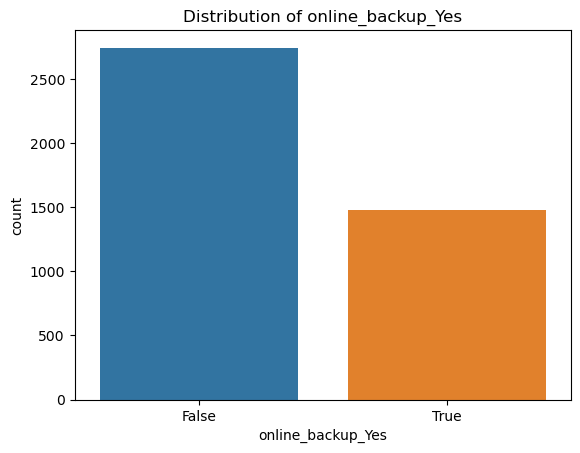

~~~~~~~~~~~~


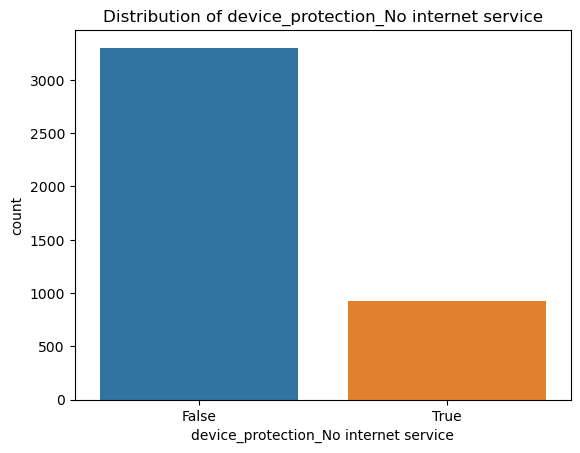

~~~~~~~~~~~~


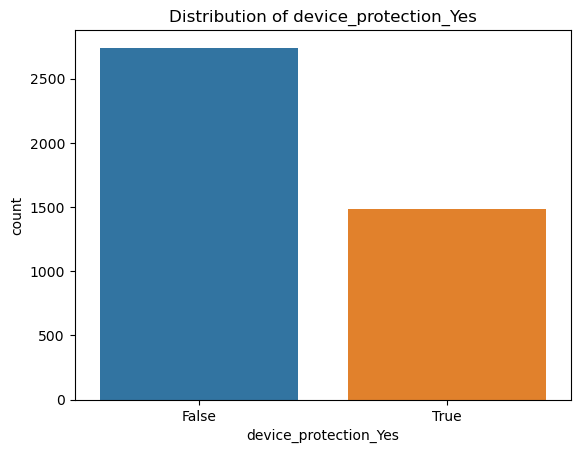

~~~~~~~~~~~~


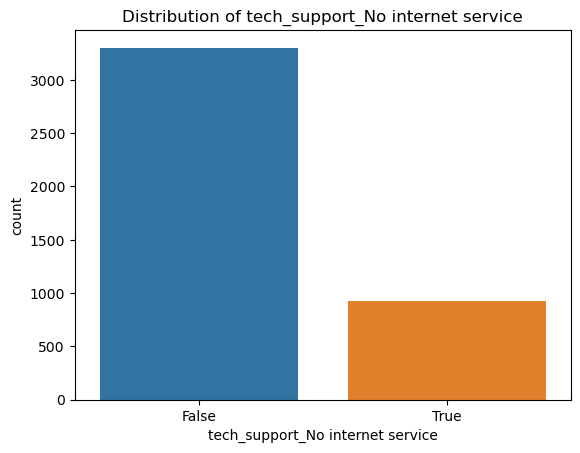

~~~~~~~~~~~~


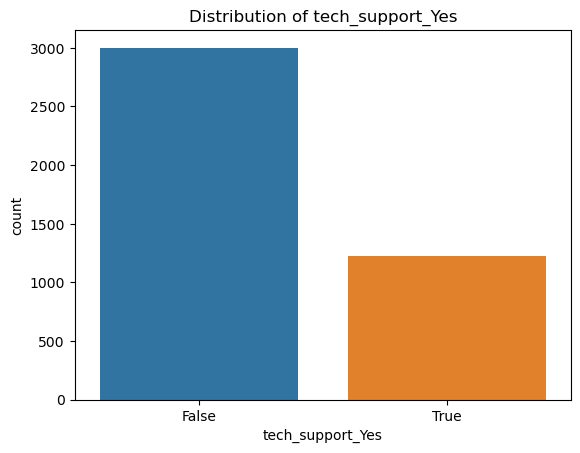

~~~~~~~~~~~~


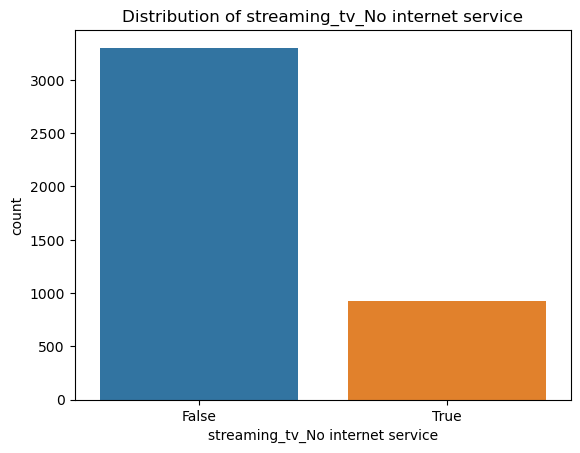

~~~~~~~~~~~~


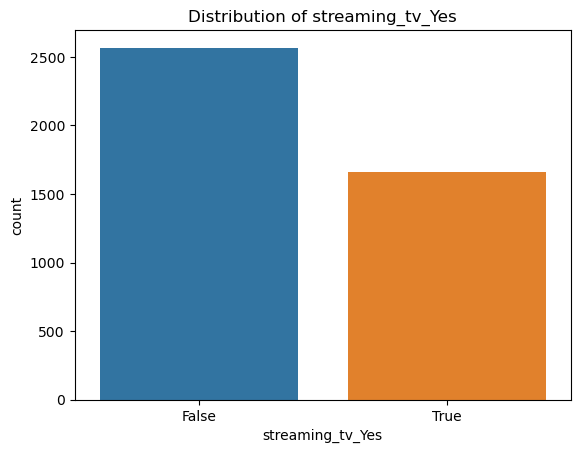

~~~~~~~~~~~~


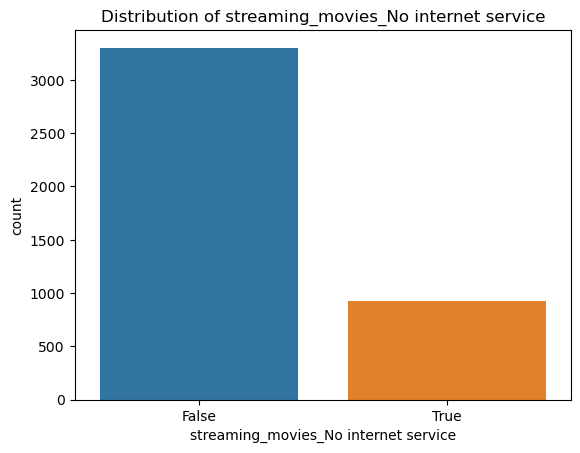

~~~~~~~~~~~~


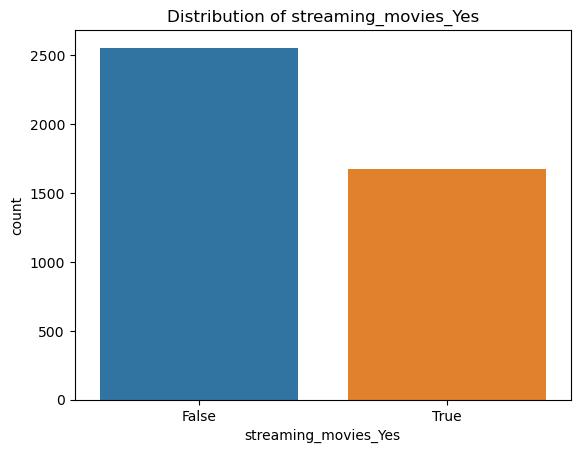

~~~~~~~~~~~~


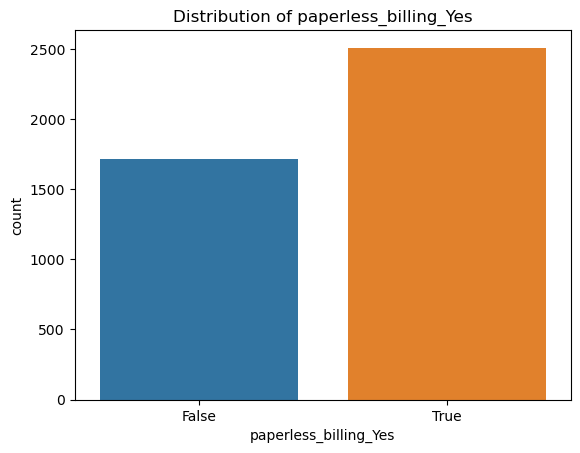

~~~~~~~~~~~~


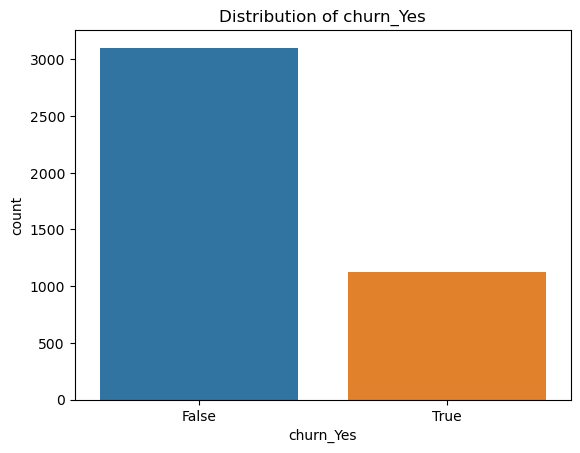

~~~~~~~~~~~~


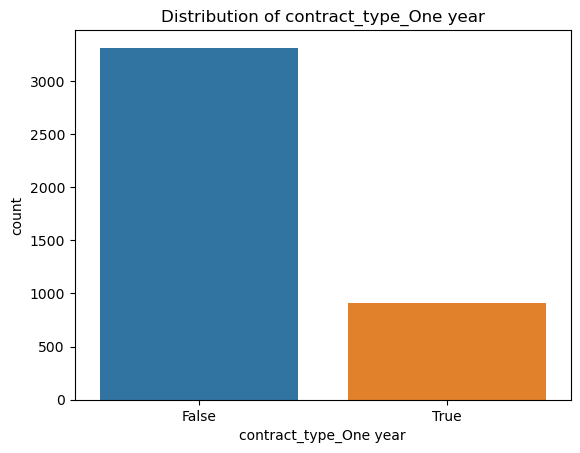

~~~~~~~~~~~~


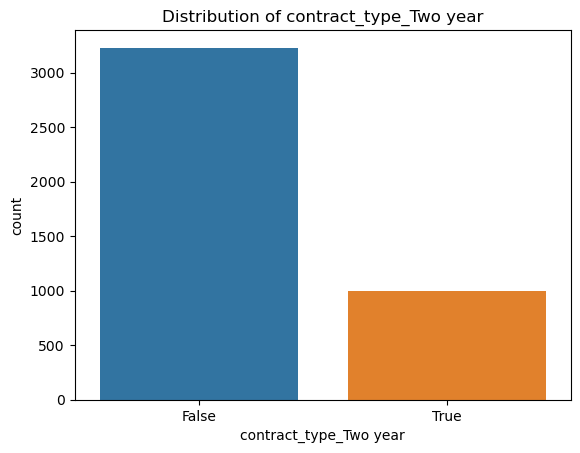

~~~~~~~~~~~~


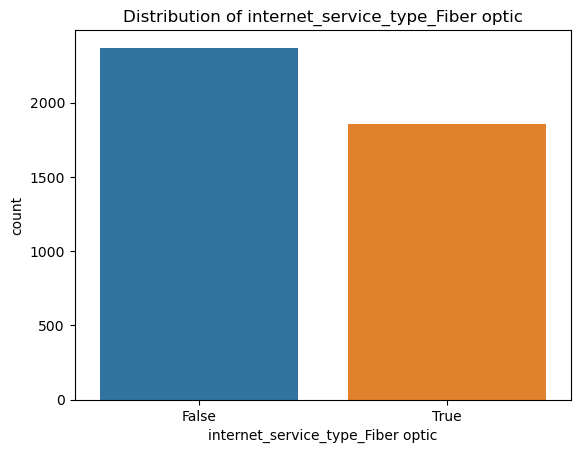

~~~~~~~~~~~~


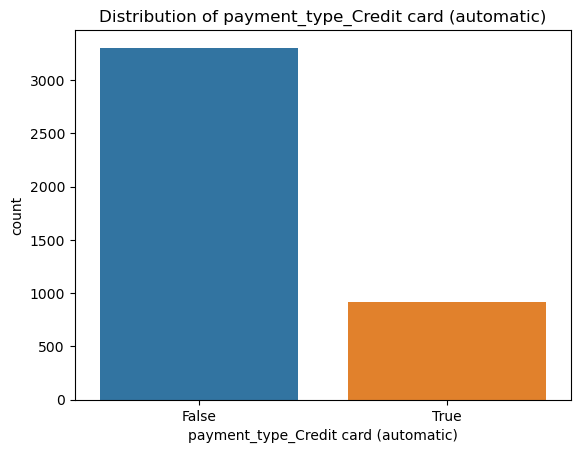

~~~~~~~~~~~~


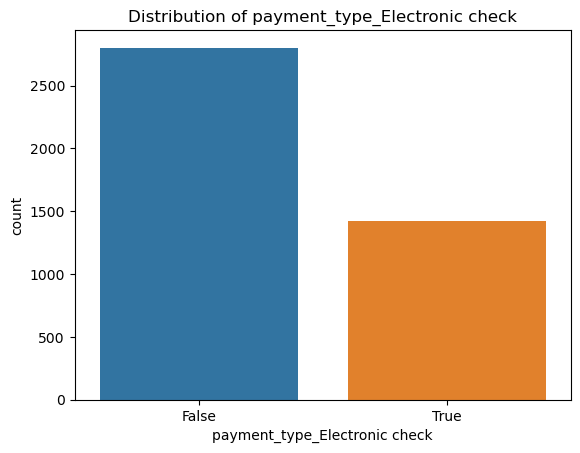

~~~~~~~~~~~~


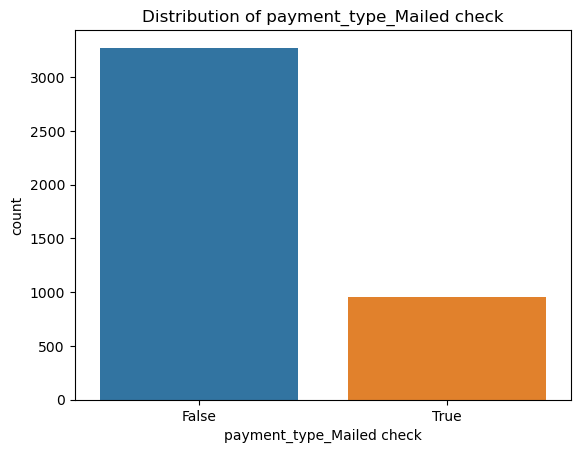

~~~~~~~~~~~~


In [499]:
for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    print('~~~~~~~~~~~~')

In [ ]:
# H0: Having dependents does not affect churning
# Ha: Customers are less likely to churn if they have dependents

In [503]:
pd.crosstab(train.dependents_Yes, train.churn_Yes, margins=True)

churn_Yes,False,True,All
dependents_Yes,,,
False,2013,918,2931
True,1091,203,1294
All,3104,1121,4225


<Axes: xlabel='dependents_Yes', ylabel='monthly_charges'>

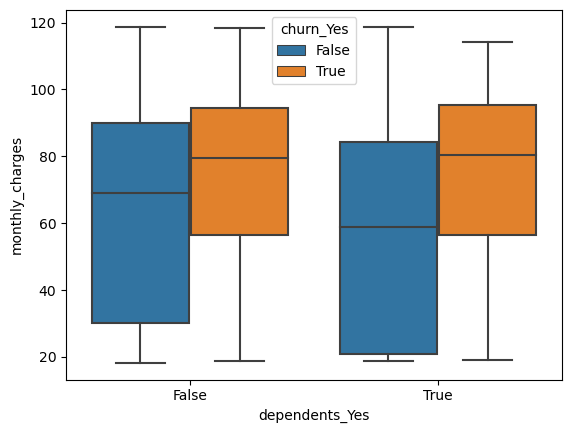

In [506]:
sns.boxplot(x=train.dependents_Yes, y=train.monthly_charges, hue=train.churn_Yes)

* Determine if certain columns should be dropped


* Determine if it would be valuable to bin some numeric columns


* Determine if it would be valuable to combine multiple columns into one.


* What are your drivers of churn?



Does it make sense to combine any features?



Do you find any surprises?



Document any and all findings and takeaways in your notebook using markdown.